We'll review elementary univariate probability distributions in statistics, including how the mean/variance are derived, simple relationships, and the questions they answer, with calculations done in scipy.

This review is similar in spirit to [brand name distributions](https://www.stat.umn.edu/geyer/5101/notes/brand.pdf) and [univariate distribution relationships](http://www.math.wm.edu/~leemis/2008amstat.pdf).

In [ ]:
import scipy.special as sp
import scipy.stats as ss
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

The univariate probability distributions answer questions about events occuring on a discrete time interval $D_n = [0, 1, \dotsc, n ]$ or a continuous time interval $I_t = [0, t]$. 

In the discrete case each event could be a success with probability $p$ or a failure with probability $1-p$, with different events being independent. Then we can ask the following questions:

1. For fixed $n$, what is the probability of observing $k$ successes?
2. How many events do we have to observe before seeing $1$ success or more generally, $r$ successes? 

The first question is answered by the Binomial distribution, and the second is answered by the geometric and negative binomial distributions. A concrete example of such events are coin tosses, where the outcome of each toss is independent of previous tosses, and each toss comes up as heads with probability $p = \frac{1}{2}$.

In the case of a continuous time interval $I_t$ there are many types of events that can occur, but we'll study the simplest type with real world applications, the events associated with a Poisson process. Then we can ask the following questions about a Poisson process:

1. Within a fixed time $t$, what is the probability of observing $k$ events?
2. How much time do we have to wait before seeing the first event or more generally, $r$ events?

The first question is answered by the Poisson distribution, and the second is answered by the exponential and Erlang (Gamma) distributions. A concrete example of events following a Poisson process are the distribution of earthquakes in a given region.

Finally, the normal distribution will arise as the limiting distribution in the famous central limit theorem. 

Moving forward, do remember that

$$ \operatorname{var}[X] = \mathbb{E}[(X - \mathbb{E}[X] )^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $$

### Bernoulli distribution

Suppose X is a random variable denoting having a trial with a probability of success $p$. It gives a success, $X = 1$, with probability $p$  and  failure, $X = 0$, with probability $1-p$. Then $X \sim \operatorname{Ber}(p)$, and

$$\mathbb{E}[X] = p,  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = p (1-p)$$

In [17]:
p = 0.4

rv = ss.bernoulli(p)

mean, var, skew, kurt = rv.stats(moments='mvsk')
print("mean {}, var {}, skew {}, kurt {}".format(mean, var, skew, kurt))

mean 0.4, var 0.24, skew 0.40824829046386296, kurt -1.8333333333333337


In [8]:
rv.interval(0.99)

(0.0, 1.0)

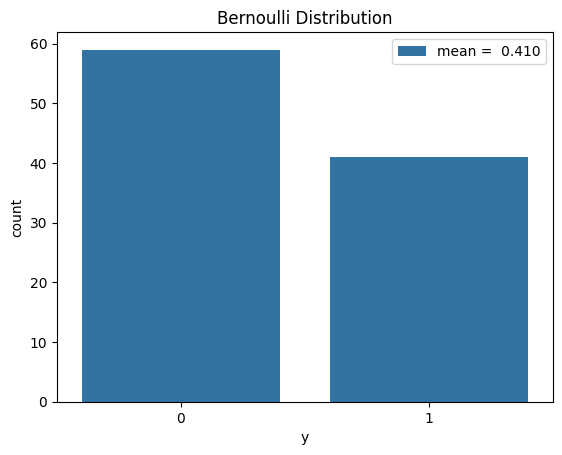

In [9]:
fig, ax = plt.subplots()

y = np.random.binomial(1, p, size=100)

sns.countplot(x=y, label=f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend(loc='upper right')
ax.set(title='Bernoulli Distribution', xlabel='y');

P(X = 1) is calculated using the probability mass function below:

In [10]:
rv.pmf(1)

0.4

### Binomial distribution

When we have $n$ independent trials, each with a probability of success $p$ and failure $1-p$, then $X \sim \operatorname{Bin}(n, p)$ which is a sum of $n$ independent $\operatorname{Ber}(p)$ random variables. I.e. letting $X_i \sim \operatorname{Ber}(p)$ for $i = 1, \dotsc, n$, then

$$ X = \sum_{i=1}^n X_i $$

and a straightforward calculation gives

$$\mathbb{E}[X] = n p,  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = n p (1-p)$$

In [11]:
p, n = 0.4, 10

rv = ss.binom(n, p)

mean, var, skew, kurt = rv.stats(moments="mvsk")
print("mean {}, var {}, skew {}, kurt {}".format(mean, var, skew, kurt))

mean 4.0, var 2.3999999999999995, skew 0.1290994448735805, kurt -0.1833333333333333


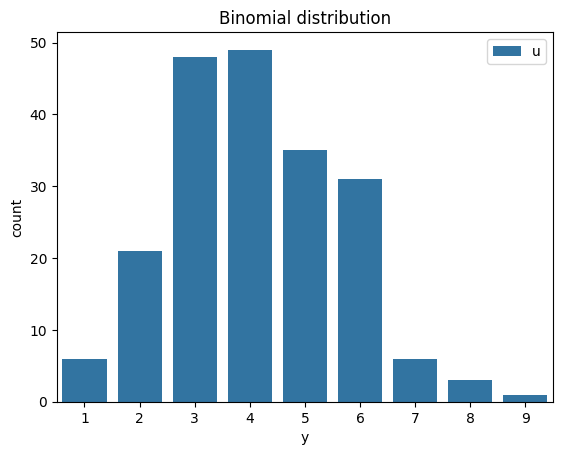

In [12]:
fig, ax = plt.subplots()

y = np.random.binomial(n, p, size=200)
sns.countplot(x=y, label=f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend("upper right")
ax.set(title="Binomial distribution", xlabel="y");

P(X = 3) is calculated using the probability mass function below:

In [117]:
rv.pmf(3)

0.21499084799999976

Do a quick check that the probability mass function is normalized:

In [129]:
sum (rv.pmf(i) for i in range(n+1))

0.9999999999999994

### Geometric distribution

Suppose independent trials, each with a probability of success $p$, are performed until success occurs. Then the number of trials until the first success occurs is a random variable $X \sim \operatorname{Geo}(p)$, and called a geometric random variable. Its probability mass function is:

$$ P(X= n) = (1-p)^{n-1} p, \: \: n= 1,2,\dotsc $$

Using the probability generating function we calculate:

$$\mathbb{E}[X] = \frac{1}{p},  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = \frac{1-p}{p^2}$$

In [132]:
p = 0.4

rv = ss.geom(p)

mean, var, skew, kurt = rv.stats(moments="mvsk")
print("mean {}, var {}, skew {}, kurt {}".format(mean, var, skew, kurt))

mean 2.5, var 3.749999999999999, skew 2.0655911179772892, kurt 6.2666666666666675


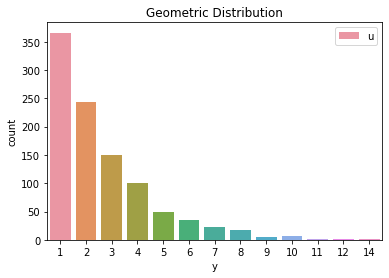

In [139]:
fig, ax = plt.subplots()

y = np.random.geometric(p, size=1000)
sns.countplot(x=y, label =f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend("upper right")
ax.set(title="Geometric Distribution", xlabel="y");

As the above histogram hints at, the geometric distribution is the discretization of the exponential distribution, and shares the memoryless property:

$$ P(X > n + k | X > k) = P(X > n) $$

### Negative Binomial distribution

Suppose independent trials, each with a probability of success $p$, are performed until success occurs (with the last trial being a success). Then the number of trials until $r$ successes occur is a random variable $X \sim \operatorname{NegBin}(r,p)$ and called a negative binomial random variable, which can be expressed as a sum of $r$ independent geometric distributions $X_i \sim \operatorname{Geo}(p)$ for $i = 1, \dotsc, n$.

$$ X = X_1 + X_2 + \dotsc + X_n $$

The probability mass function is:

$$ P(X = k) = { k + r - 1 \choose k} p^r (1-p)^{k} $$

where $k$ is the number of failures seen before seeing a total of $r$ successes.

$$\mathbb{E}[X] = \frac{r (1-p)}{p},  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = r\frac{(1-p)}{p^2}$$

In [167]:
p = 0.4
r = 4


rv = ss.nbinom(r, p)

mean, var, skew, kurt = rv.stats(moments="mvsk")
print("mean {}, var {}, skew {}, kurt {}".format(mean, var, skew, kurt))

mean 5.999999999999999, var 14.999999999999996, skew 1.0327955589886446, kurt 1.5666666666666669


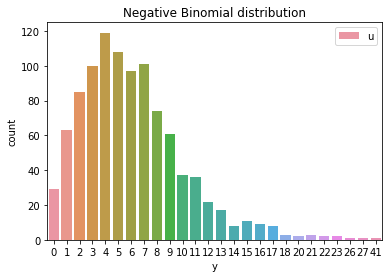

In [170]:
fig, ax = plt.subplots()

y = np.random.negative_binomial(r, p, size=1000)
sns.countplot(x=y, label=f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend("upper right")
ax.set(title="Negative Binomial distribution", xlabel="y");

### Poisson distribution and processes

The number of events occuring in a fixed time interval $t$, with each event occuring independently of each other and at a average constant rate $\lambda$ is described by the Poisson distribution with parameter $\mu = \lambda t$, $X \sim Poi(\mu)$, and has the probability mass function:

$$ P(X = k) = \frac{\mu^k}{k!} e^{-\mu}  \: \: k = 0,1,\dotsc$$

The standard moments are,

$$\mathbb{E}[X] = \mu = \lambda t,  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = \mu$$

Note that the time till the first event in a Poisson process is described by the exponential distribution with parameter $\lambda$, and the time till the first $r$ events in a Poisson process is described by the Erlang (Gamma) distribution with shape $r$ and rate $\lambda$. See below for definitions.

Also see section 20.2 from the stats cookbook for a good summary of the Poisson process and the different distributions involved.

In [185]:
mu = 6

rv = ss.poisson(mu)

mean, var, skew, kurt = rv.stats(moments="mvsk")
print("mean {}, var {}, skew {}, kurt {}".format(mean, var, skew, kurt))

mean 6.0, var 6.0, skew 0.408248290463863, kurt 0.16666666666666666


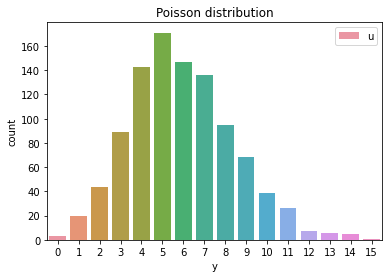

In [189]:
fig, ax = plt.subplots()

y = np.random.poisson(mu, size=1000)
sns.countplot(x=y, label=f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend("upper right")
ax.set(title="Poisson distribution", xlabel="y");

### Gamma function and distribution

Recall the Gamma function, $\Gamma(\alpha)$, is a function of a real variable, such that $\Gamma(\alpha) = \alpha!$ for $\alpha = 0, 1, 2 \dotsc$.

The Gamma distribution then has the probability distribution:

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1} e^{-\beta x} \beta^\alpha}{\Gamma(\alpha)} \text{ for } x > 0$$

with $\alpha >0$ called the shape and $\beta >0 $ called the rate. $\theta = 1/\beta$ is also called the scale parameter.

If $X \sim \operatorname{Ga}(\alpha, \beta)$ (see [@Murphy2012MachineL]), then the standard moments are

$$\mathbb{E}[X] = \frac{\alpha}{\beta},  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = \frac{\alpha}{\beta^2}$$
$$\operatorname{mode}{X} = \frac{(\alpha-1)}{\beta} $$

We parameterize the Gamma distribution in scipy as follows.

In [80]:
alpha, beta  = 3, 1
rv = ss.gamma(a=alpha,scale=1/beta)

In [81]:
rv.interval(0.99)

(0.33786338872773347, 9.273792089255544)

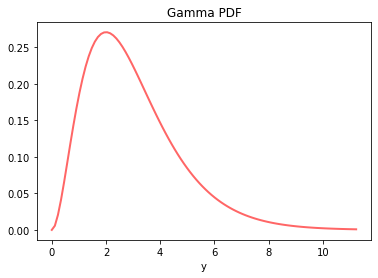

In [85]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, rv.ppf(0.999), 100)

ax.plot(x, rv.pdf(x), 'r-', lw=2, alpha=0.6, label='gamma pdf')
ax.set(title="Gamma PDF", xlabel="y");

### Exponential distribution

The Exponential, Erlang, and Chi-Squared distributions are all related to the Gamma distribution [@Murphy2012MachineL], but we'll describe the simplest, the exponential distribution. 

$$ \operatorname{Exp}(x | \lambda) =  \operatorname{Ga}(x | 1, \lambda)$$

where $\lambda$ is the rate parameter. The exponential distribution describes the waiting time between events in a Poisson process.

From the above formulas, if $X \sim \operatorname{Exp}(x | \lambda)$, then

$$\mathbb{E}[X] = \frac{1}{\lambda},  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = \frac{1}{\lambda^2}$$
$$\operatorname{mode}{X} = 0 $$

The exponential distribution, which is the continuous analog of the geometric distribution, also has the memoryless property:

$$ P(X > t + h | X > h) = P(X > t )$$

for any $t, h > 0 $.

### Characteristic functions of random variables

The charactierstic function will be useful for working with these distributions.

The characteristic function (also called the Fourier transform) of a random variable $X$ is 

$$\phi(t) = \mathbb{E}[e^{i t X}] \: \: \text{ for } t \in \mathbb{R}$$

This function satisfies $|\phi(t)| <= 1$ for all $t$ and is uniformly continuous. It has some advantages over the moment generating function, including the fact that it's defined everywhere, and that it uniquely determines the random variable [@Grimmett2001ProbabilityAR].

Some other facts that we can derive from characteristic functions:

1. If $\phi^k(0)$ and $\mathbb{E}[|X^k|] < \infty$, then

$$ \phi^k(0) = i^k \mathbb{E}[X^k] $$

2. If $X_1, X_2, \dotsc, X_n$ are independent then

$$ \phi_{X_1 + \dotsc + X_n}(t) = \phi_{X_1}(t) \dots \phi_{X_n}(t)  $$

3. If $a, b \in \mathbb{R}$ and $Y = a X + b $ then 

$$ \phi_{Y}(t) = e^{i t b } \phi_{a X}(t) $$

4. For random variables $X$ and $Y$, define the join characteristic function of $X$, and $Y$ by $\phi_{X, Y}(s,t) = \mathbb{E}[e^{i s X} e^{i t Y}]$. Then $X$ and $Y$ are independent iff

$$ \phi_{X, Y}(s,t) = \phi_X(s) \phi_Y(t) \text{ for all } s, t \in \mathbb{R} $$

See chapter 5 of [@Grimmett2001ProbabilityAR] for the statement and proof of the above facts.

### Examples of characteristic functions

If $X \sim \operatorname{Ber}(p)$ then

$$ \phi(t) = 1 - p + p e^{i t} $$

If $X \sim \operatorname{Bin}(n,p)$ then

$$ \phi(t) = (1 - p + p e^{i t} )^n $$

If $X \sim \operatorname{NegBin}(r,p)$ then

$$ \phi(t) = \left (\frac{p}{1 - e^{it} + p e^{i t}} \right )^r $$

If $X \sim \operatorname{Gam}(\alpha, \beta)$ then

$$ \phi(t) = \left (\frac{\beta}{\beta - i t} \right )^\alpha $$


If $X \sim \operatorname{Exp}(\lambda)$ then

$$ \phi(t) = \frac{\lambda}{\lambda - i t}  $$

If $X \sim \operatorname{Poi}(\mu)$ then

$$ \phi(t)  = e^{\mu ( e^{i t} - 1)}$$

If $X \sim \operatorname{N}(\mu, \sigma)$ then

$$ \phi(t) = \exp( i \mu t - \frac{\sigma t^2}{2}) $$

If $X \sim U(a, b)$ (continuous Uniform random variable) then

$$ \phi(t) = \frac{e^{i t b} - e^{i t a}}{ i t (b - a)} $$

See section 5.8 in [@Grimmett2001ProbabilityAR] for more details. Those functions, plus the above facts about characteristic functions, and the following 

$$ \operatorname{var}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $$

can be used to calculate $\mathbb{E}[X]$ and $\operatorname{var}[X]$.

The above formulas also clearly show which distributions are closed under taking sums of independent copies.

### Normal distribution, weak law of large numbers, and the central limit theorem

We'll now study the normal distribution as the error distribution in the central limit theorem.

First recall that the normal distribution has the probability distribution:

$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \left (\frac{x-\mu}{\sigma} \right)^2}$$

where $\mu \in \mathbb{R}$ and $\sigma > 0$, and the standard moments are

$$\mathbb{E}[X] = \mu,  \: \: \mathbb{E}[(X - \mathbb{E}[X] )^2] = \sigma$$
$$\operatorname{mode}{X} = \mu $$

Now consider a sequence $X_1$, $X_2$, ... of independent and identically distributed random variables each with mean $\mu$ and standard deviation $\sigma$ (good examples being the Bernoulli and Exponential distributions). Let $S_n = X_1 + X_2 + \dots + X_n$ be their partial sums, then the *weak law of large numbers*^[The strong law of large numbers refers to almost everywhere convergence of the random variables.] says that $\frac{S_n}{n}$ converges to $\mu$ in distribution as $n$ approaches $\infty$ (see section 5.10 in [@Grimmett2001ProbabilityAR]). We'll illustrate this theorem by way of example below.

In [83]:
lam = 0.5
mu = 2

def draw(n):
    return np.random.exponential(mu, size=n)

Below we'll plot the distribution of $\frac{S_n}{n}$ for $n = 1, 100$ and $1000$ to see the weak law in action.

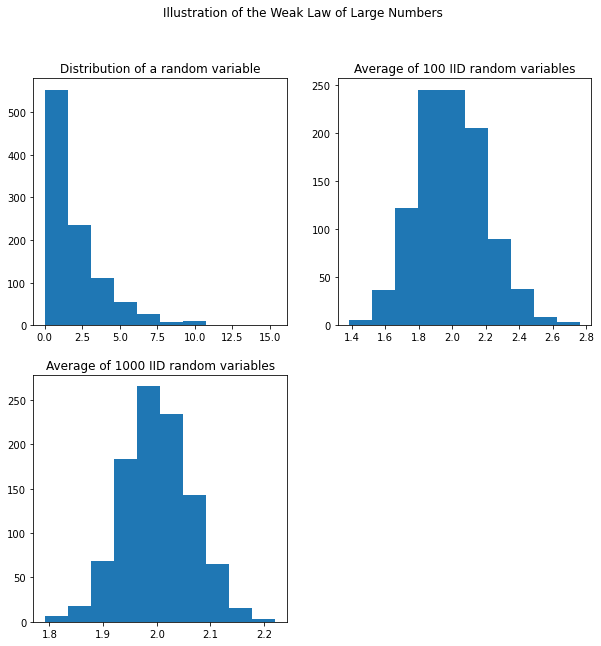

In [84]:
fig = plt.figure(figsize=(10,10))

n = 1
y = np.array([ sum(draw(n))/n for i in range(1000) ] )
ax = fig.add_subplot(221)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text("Distribution of a random variable")

n = 100
y = np.array([ sum(draw(n))/n for i in range(1000) ] )
ax = fig.add_subplot(222)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text(f"Average of {n} IID random variables")

n = 1000
y = np.array([ sum(draw(n))/n for i in range(1000) ] )
ax = fig.add_subplot(223)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text(f"Average of {n} IID random variables")
fig.suptitle('Illustration of the Weak Law of Large Numbers')
plt.show()

It clearly looks like the errors in $\frac{S_n}{n} - \mu$ are approaching a normal distribution, in fact $(S_n - n \mu)/ \sqrt{n \sigma^2}$ approaches $N(0,1)$ in distribution as $n$ approaches $\infty$ (provided the $X_i$s has finite non-zero variance, [@Grimmett2001ProbabilityAR]). This fact is the famous *central limit theorem*, which we'll illustrate below.

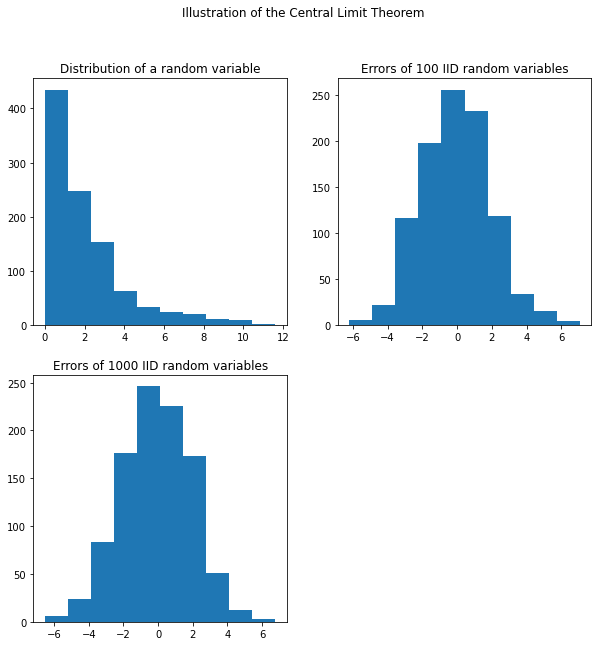

In [79]:
fig = plt.figure(figsize=(10,10))

n = 1
y = np.array([ sum(draw(n))/n for i in range(1000) ] )
ax = fig.add_subplot(221)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text("Distribution of a random variable")

n = 100
y = np.array([ (sum(draw(n)) - mu * n)/np.sqrt(n) for i in range(1000) ] )
ax = fig.add_subplot(222)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text(f"Errors of {n} IID random variables")

n = 1000
y = np.array([ (sum(draw(n)) - mu * n)/np.sqrt(n) for i in range(1000) ] )
ax = fig.add_subplot(223)
ax.hist(y, label=f'mean = {y.mean(): 0.3f}')
ax.title.set_text(f"Errors of {n} IID random variables")
fig.suptitle('Illustration of the Central Limit Theorem')
plt.show()

Note that it's straightforward to check that

$$ \mathbb{E}[(S_n - n \mu)/ \sqrt{n \sigma^2}] = 0, \: \: \operatorname{var}[(S_n - n \mu)/ \sqrt{n \sigma^2}] = 1$$

for all $ n > 0 $. So the first two moments of $(S_n - n \mu)/ \sqrt{n \sigma^2}$ agree with the first two moments of $N(0, 1)$. The central limit theorem then says that in the limit of large $n$, all moments of $(S_n - n \mu)/ \sqrt{n \sigma^2}$ agree with all moments of $N(0, 1)$.

Observe that these theorems naturally apply to the Bernoulli and Exponential distributions in the limit of large $n$, showing that after setting the mean to zero and scaling by the standard deviation, they both converge to the standard normal distribution.

Finally, note that the weak law of large numbers, and the central limit theorem can be proven fairly elegantly using charactierstic functions (see [@Grimmett2001ProbabilityAR], for example). Also see chapter 15 in [Introduction to probability at an advanced level](https://www.stat.berkeley.edu/~aditya/resources/AllLectures2018Fall201A.pdf) for more applications of the central limit theorem.

More summaries of standard statistics can be found in [stats cookbook](http://statistics.zone/).